In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt 
import folium
import contextily as cx

In [2]:
df = gpd.read_file("C:/repos/satellite-images-nso/input_data/N2000_pzh.shp")

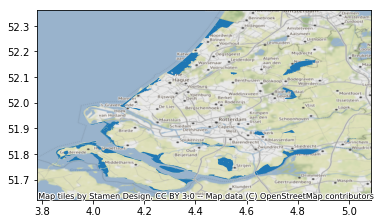

In [3]:
ax = df['geometry'].plot()
cx.add_basemap(ax, crs=df.crs)
plt.show()


In [14]:
m = folium.Map([52.22469475008359, 4.414848969719968], zoom_start=10)

In [15]:
m

In [5]:
df.to_file("N2000_pzh.json", driver="GeoJSON")

In [14]:
df[df['naam_n2k'] == "Solleveld & Kapittelduinen"].to_file("natura2000_solleveld&kapittelduinen.json", driver="GeoJSON")

In [7]:
import rasterio
import numpy as np
from rasterio.plot import show

In [2]:
import glob
import pandas  as pd

In [7]:
pd.DataFrame([file.replace("\\","/") for file in glob.glob("E:/data/*/*cropped*.tif")],columns=["Path"])

Path
0    E:/data/coepelduynen/20190302_105726_SV1-01_50...
1    E:/data/coepelduynen/20190302_105726_SV1-01_50...
2    E:/data/coepelduynen/20190302_105829_SV1-01_50...
3    E:/data/coepelduynen/20190302_105829_SV1-01_50...
4    E:/data/coepelduynen/20190308_111644_SV1-01_50...
..                                                 ...
99   E:/data/waterleidingduinen/20190729_111526_SV1...
100  E:/data/waterleidingduinen/20190729_111526_SV1...
101  E:/data/waterleidingduinen/20200304_114559_SV1...
102  E:/data/waterleidingduinen/20200323_112113_SV1...
103  E:/data/waterleidingduinen/20210426_112146_SV1...

[104 rows x 1 columns]

In [5]:
raster_path_cropped = "E:/data/coepelduynen/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height.tif"

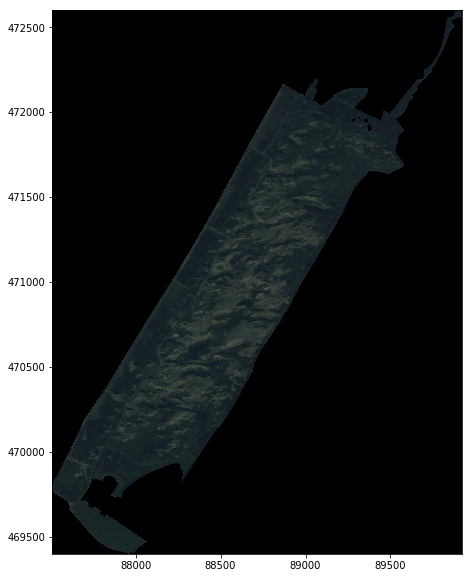

In [8]:
src = rasterio.open(raster_path_cropped)
plot_out_image = np.clip(src.read()[2::-1],
                        0,2200)/2200 # out_image[2::-1] selects the first three items, reversed

plt.figure(figsize=(10,10))
rasterio.plot.show(plot_out_image,
            transform=src.transform)
plt.show()

In [10]:
df[df['naam_n2k'] == "Solleveld & Kapittelduinen"].explode().to_file("natura2000_solleveld&kapittelduinen.json", driver="TopoJSON")

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  """Entry point for launching an IPython kernel.


DriverError: unsupported mode: 'w'

In [9]:
# Plotting shape files.

import geopandas as gpd

c:\ProgramData\Anaconda3\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.4.3-CAPI-1.8.3 r4285) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [49]:
import glob


df = pd.DataFrame([file.replace("\\","/") for file in glob.glob("E:/output/*/*cluster*.shp")],columns=["Path"])
print(df)

                                                 Path
0   E:/output/Coepelduynen_segmentations/20190302_...
1   E:/output/Coepelduynen_segmentations/20190302_...
2   E:/output/Coepelduynen_segmentations/20190308_...
3   E:/output/Coepelduynen_segmentations/20190422_...
4   E:/output/Coepelduynen_segmentations/20190601_...
5   E:/output/Coepelduynen_segmentations/20191025_...
6   E:/output/Coepelduynen_segmentations/20191130_...
7   E:/output/Coepelduynen_segmentations/20191202_...
8   E:/output/Coepelduynen_segmentations/20200304_...
9   E:/output/Coepelduynen_segmentations/20200304_...
10  E:/output/Coepelduynen_segmentations/20200323_...
11  E:/output/Coepelduynen_segmentations/20200323_...
12  E:/output/Coepelduynen_segmentations/20200326_...
13  E:/output/Coepelduynen_segmentations/20200508_...
14  E:/output/Coepelduynen_segmentations/20200625_...
15  E:/output/Coepelduynen_segmentations/20200625_...
16  E:/output/Coepelduynen_segmentations/20200731_...
17  E:/output/Coepelduynen_s

In [60]:
df.values[0][0]

'E:/output/Coepelduynen_segmentations/20190302_105726_SV1-01_50cm_RD_11bit_RGBI_Warmond_natura2000_coepelduynen_cropped_ndvi_height_normalised_cluster_model.shp'

In [68]:
gdf2 = gpd.read_file(df.values[1][0])
gdf2['area'] = gdf2['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.area / 10**3)
gdf2['perimeter'] =gdf2['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.length)

c:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


TypeError: unsupported operand type(s) for -: 'float' and 'AxesSubplot'

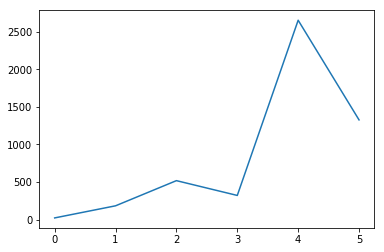

In [70]:
gdf['area']-gdf2['area']

In [61]:
gdf = gpd.read_file(df.values[0][0])

In [51]:
gdf.area

0      22564.0
1     270868.0
2    1048384.0
3     229600.0
4       5672.0
5     317956.0
dtype: float64

In [26]:
gdf['label'] = gdf['label'].astype(str)

In [29]:
gdf['label'].unique()

array(['Bos', 'Hoog gras', 'Laag gras', 'Struweel', 'Water of Overig',
       'Zand'], dtype=object)

In [62]:
gdf['area'] = gdf['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.area / 10**3)
gdf['perimeter'] =gdf['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.length)


c:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [63]:
gdf

label                                           geometry  \
0              Bos  MULTIPOLYGON (((88552.000 470230.000, 88550.00...   
1        Hoog gras  MULTIPOLYGON (((87694.000 469568.000, 87694.00...   
2        Laag gras  MULTIPOLYGON (((87706.000 469594.000, 87706.00...   
3         Struweel  MULTIPOLYGON (((87812.000 469454.000, 87814.00...   
4  Water of Overig  MULTIPOLYGON (((87884.000 469420.000, 87882.00...   
5             Zand  MULTIPOLYGON (((87640.000 469632.000, 87642.00...   

          area      perimeter  
0    30.259956    6152.898975  
1    92.918272   69498.974078  
2   453.877196   82705.516957  
3   167.267877   48526.955649  
4  2755.459437  298442.267615  
5  1527.724970  154638.434582

<Figure size 7200x7200 with 0 Axes>

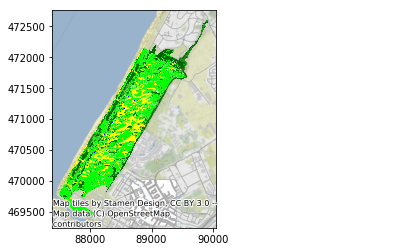

In [41]:

plt.figure(figsize=(100,100))
color_mapping = {"Bos": "forestgreen", "Hoog gras": "green", "Laag gras":"lime","Struweel":"darkgreen","Water of Overig":"blue","Zand":"yellow" }
ax = gdf.plot(color=gdf["label"].map(color_mapping))
cx.add_basemap(ax, crs=gdf.crs)
plt.show()

AttributeError: Unknown property column

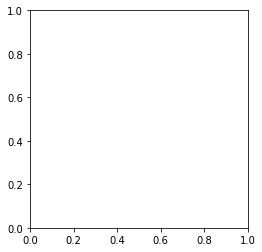

In [28]:
ax = gdf['geometry'].plot(column='label',categorical=True)
cx.add_basemap(ax, crs=gdf.crs)
plt.show()
